In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [83]:
gdp_df = pd.read_csv ("D:/Jai - NSS/python/projects/un-project-jaimreyes/data/gdp_percapita.csv")
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


#5. How many rows and columns are in `gdp_df`? What are the data types of each column? 
there are 8219 rows and 4 columns on in the df.

In [84]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


#6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [85]:
gdp_df = gdp_df.drop (columns = ['Value Footnotes'])
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [86]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [87]:
gdp_df.Year.nunique()

34

In [88]:
country_count = gdp_df.value_counts('Country').reset_index()

In [89]:
country_count.columns = ['Country', 'Count']

In [90]:
country_count

,Country,Count
0,Latvia,34
1,North America,34
2,Mongolia,34
3,Morocco,34
4,Mozambique,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [91]:
len(country_count.loc[country_count['Count'] == gdp_df.Year.nunique()])

228

In [92]:
len(country_count.loc[country_count['count'] != gdp_df.Year.nunique()])


KeyError: 'count'

<Axes: xlabel='Year'>

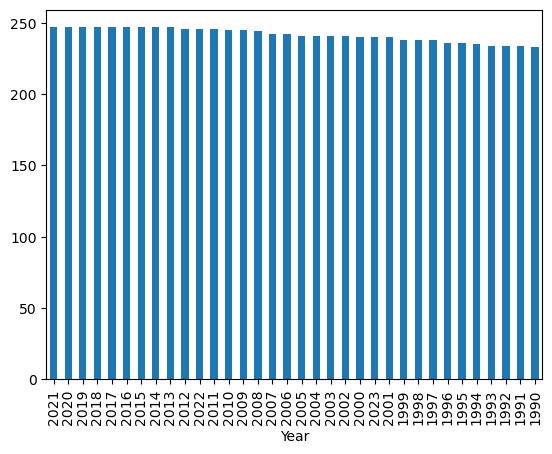

In [93]:
gdp_df['Year'].value_counts().plot(kind = 'bar')

#7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [94]:
gdp_df.isna().sum()

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64

In [95]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [96]:
gdp_df.notna()

,Country,Year,GDP_Per_Capita
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
8214,True,True,True
8215,True,True,True
8216,True,True,True
8217,True,True,True


#8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [97]:
gdp_2020 = gdp_df.loc[gdp_df ['Year'] == 2020]

In [98]:
gdp_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

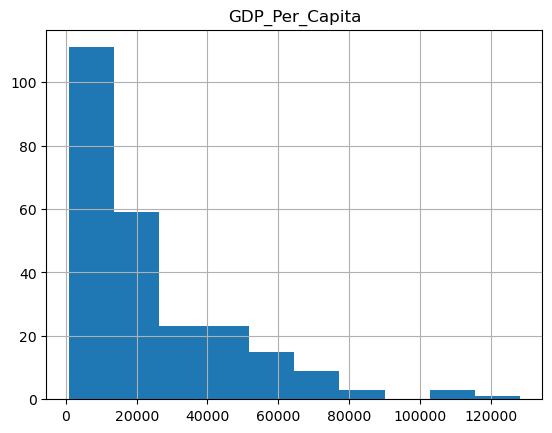

In [99]:
gdp_2020.hist('GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

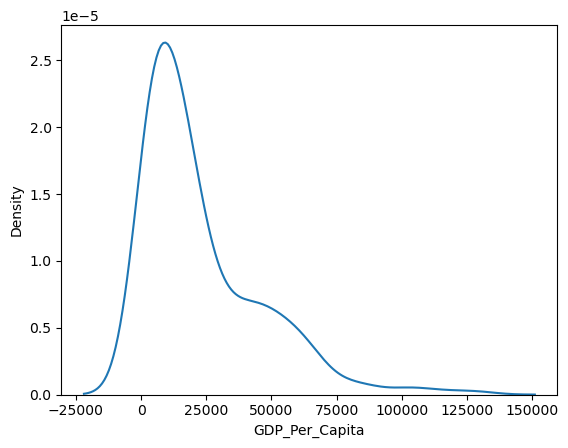

In [100]:
sns.kdeplot(data = gdp_2020, x = 'GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita'>

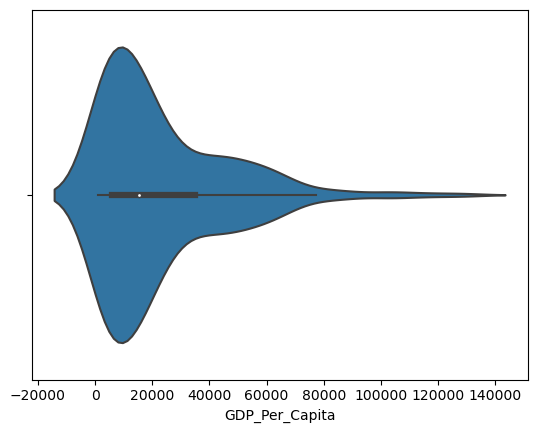

In [101]:
sns.violinplot(data = gdp_2020, x = 'GDP_Per_Capita')

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


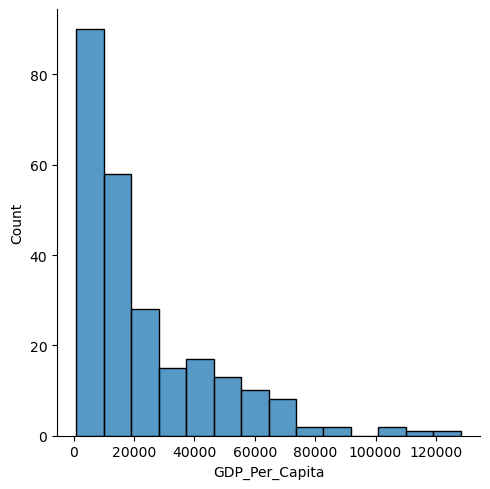

In [102]:
sns.displot( data = gdp_2020, x = 'GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita'>

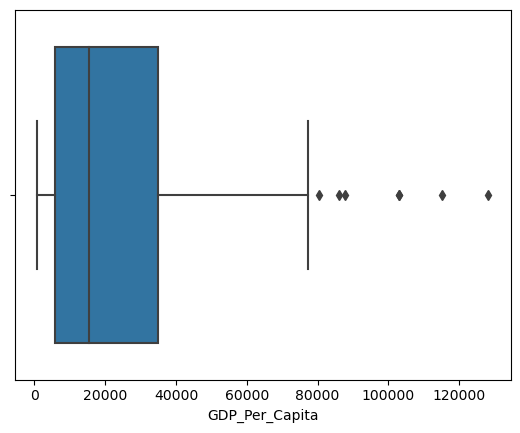

In [103]:
sns.boxplot(data = gdp_2020, x = 'GDP_Per_Capita')

<Axes: >

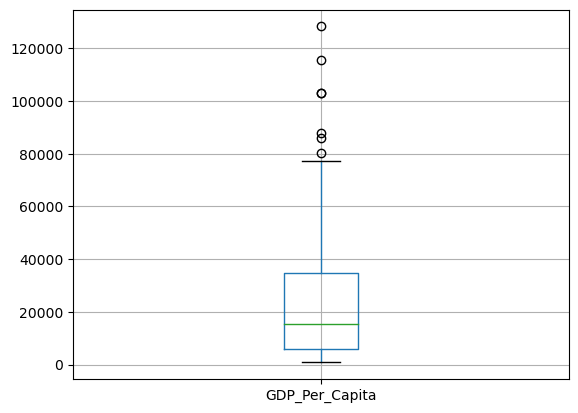

In [104]:
gdp_2020.boxplot('GDP_Per_Capita')

#9. What was the median GDP per capita value in 2020?

In [105]:
gdp_2020.GDP_Per_Capita.median()

15309.23598817024

#10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [106]:
decades = [1990,2000,2010,2020]

In [107]:
gdp_decades = gdp_df.loc[gdp_df['Year'].isin(decades)]

In [108]:
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

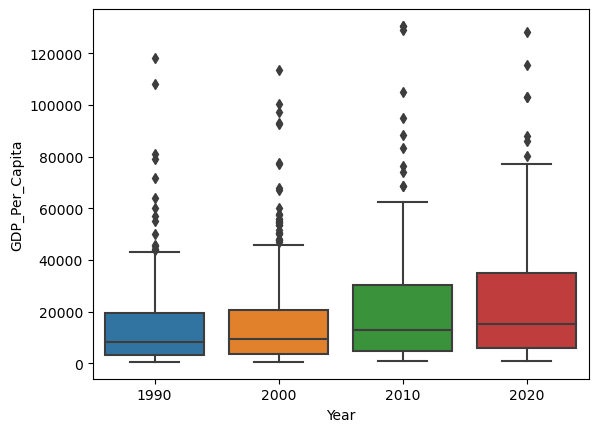

In [109]:
sns.boxplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

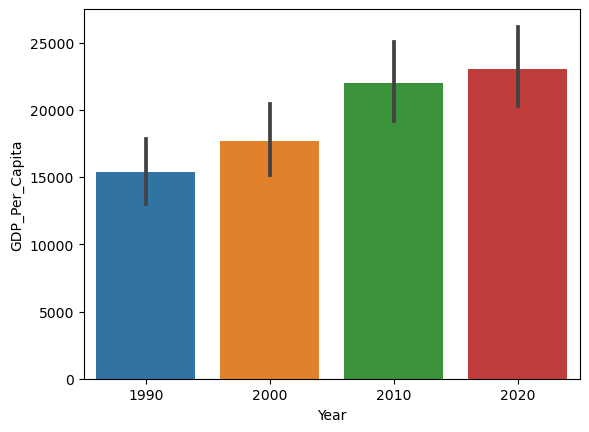

In [110]:
sns.barplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

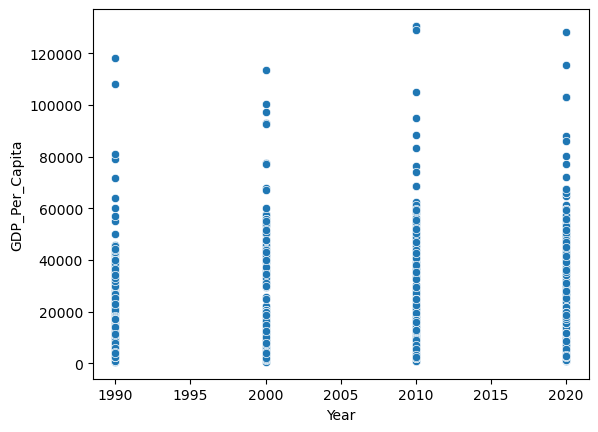

In [111]:
sns.scatterplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

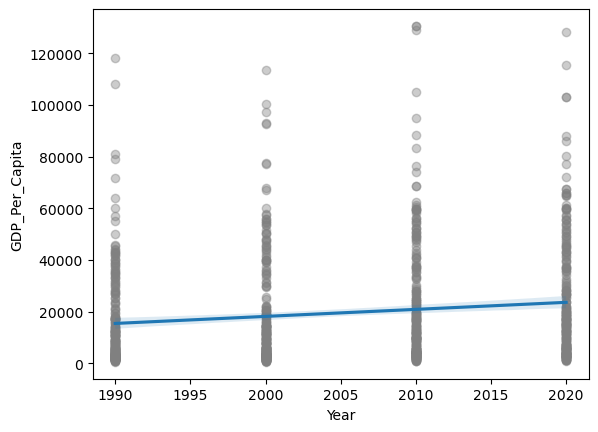

In [112]:
sns.regplot (data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita', 
             scatter_kws =  {'color': 'grey', 'alpha': 0.4})

#11. Which country was the first to have a GDP per capita greater than $100,000?

In [113]:
gdp_df.loc[gdp_df.GDP_Per_Capita > 100000].sort_values('Year').head(2).Country

7827    United Arab Emirates
974                   Brunei
Name: Country, dtype: object

#12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [114]:
top_country = gdp_2020.sort_values('GDP_Per_Capita', ascending = False).Country.head(1)

In [115]:
top_country

4426    Luxembourg
Name: Country, dtype: object

In [116]:
top_over_time = gdp_df.loc[gdp_df.Country.isin(top_country)]

<Axes: >

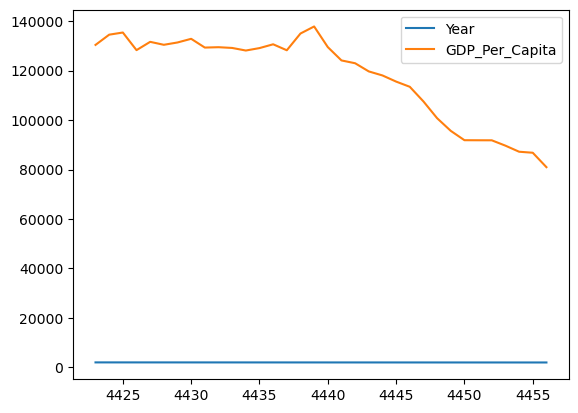

In [117]:
gdp_df.loc[gdp_df.Country.isin(top_country)].plot(kind = 'line')# x = 'Year)

(0.0, 150000.0)

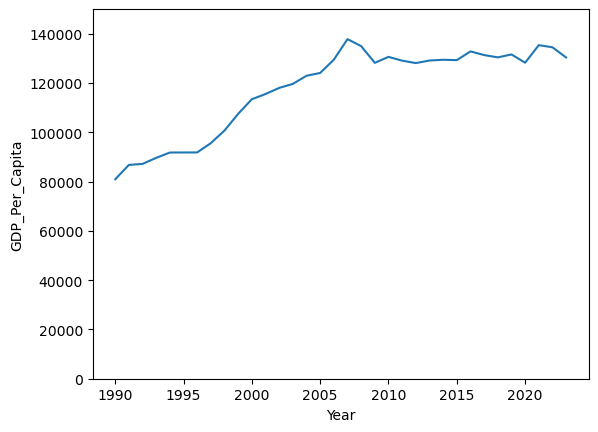

In [118]:
sns.lineplot(data = top_over_time, x = 'Year', y = 'GDP_Per_Capita')
plt.ylim(bottom = 0, top = 150000)

#13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [119]:
lowest_gdp = gdp_2020.sort_values('GDP_Per_Capita').Country.head(1)

In [120]:
lowest_over_time = gdp_df.loc[gdp_df.Country.isin(lowest_gdp)]

<function matplotlib.pyplot.ylim(*args, **kwargs)>

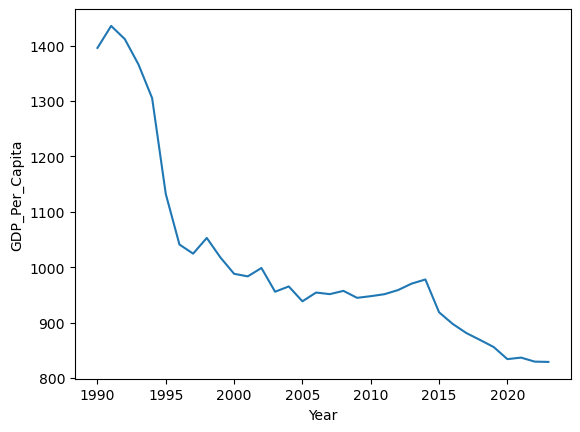

In [121]:
sns.lineplot(data =  lowest_over_time, x = 'Year', y = 'GDP_Per_Capita')
plt.ylim

In [128]:
internet_df = pd.read_csv ("D:/Jai - NSS/python/projects/un-project-jaimreyes/data/internet_use.csv.csv", nrows = 6083)

In [129]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [131]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


 # What is the first year to have a non-zero internet users percentage value?

In [130]:
internet_2000_2014

NameError: name 'internet_2000_2014' is not defined

In [ ]:
#19

In [ ]:
internet_d.loc[internet_df.internet_users_Pct < 5]

In [138]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = gdp_df['Country', 'Year'])

KeyError: ('Country', 'Year')